<a href="https://colab.research.google.com/github/Zaxzz/face_detector/blob/main/face_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.	Deteksi Wajah Menggunakan Citra Digital

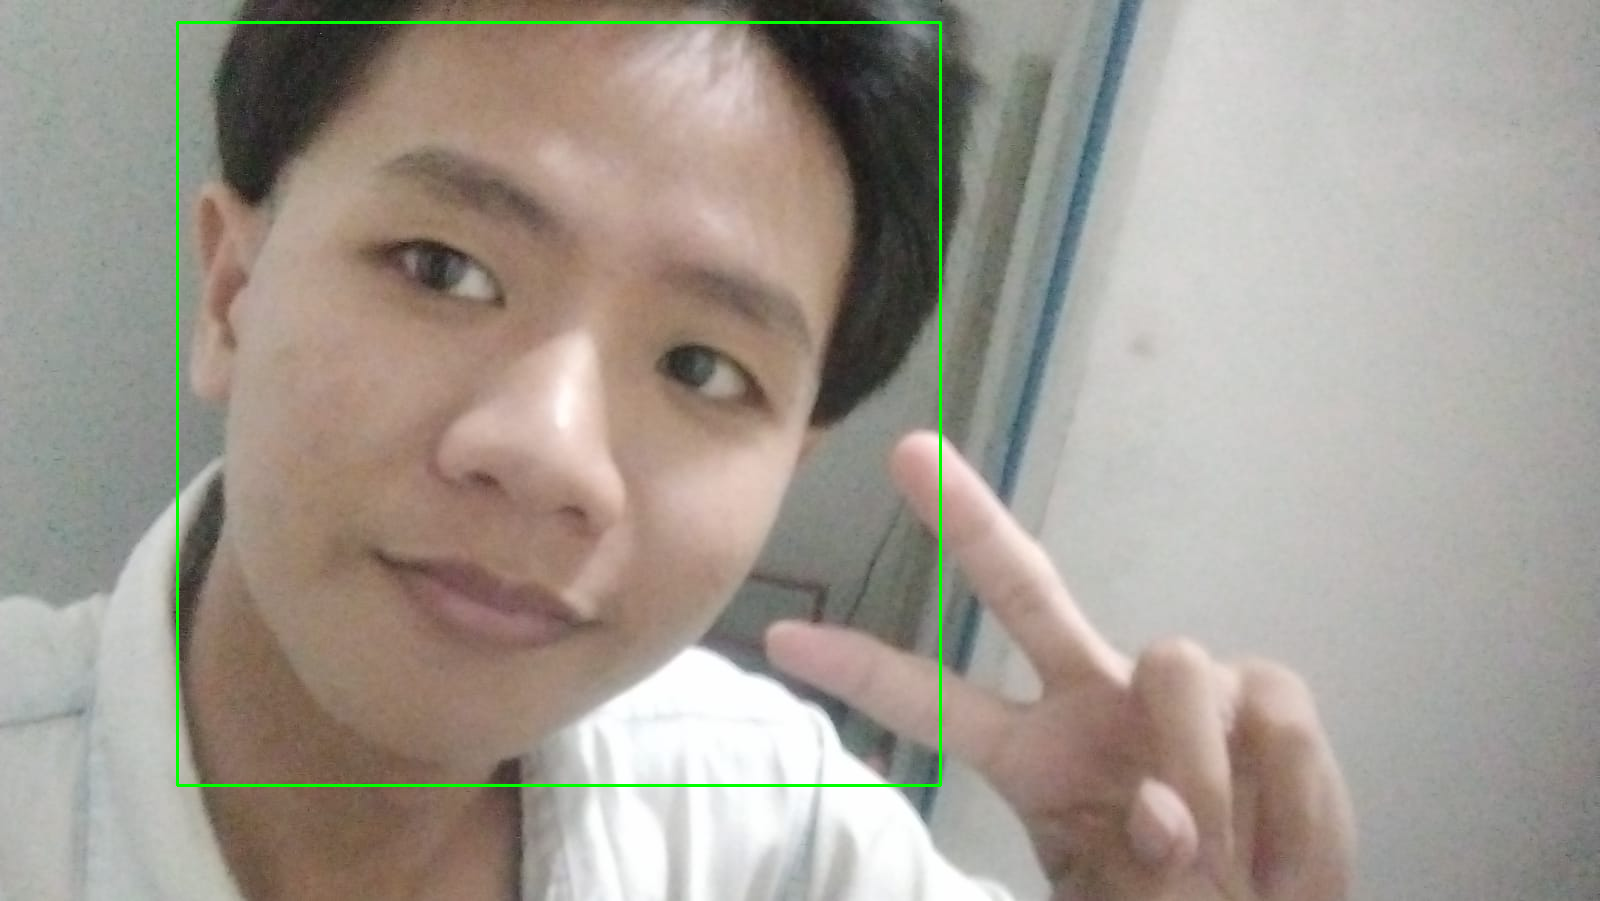

In [18]:
# Mengimpor pustaka yang diperlukan
from google.colab.patches import cv2_imshow  # Fungsi khusus untuk menampilkan gambar di Google Colab
import cv2  # Pustaka OpenCV untuk pemrosesan gambar

# Membaca gambar dari file
img = cv2.imread('fotoganang.jpeg')

# Mengubah gambar ke grayscale agar lebih mudah dideteksi oleh model
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Memuat model Haar Cascade untuk deteksi wajah
haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Mendeteksi wajah dalam gambar grayscale
faces_rect = haar_cascade.detectMultiScale(gray, 1.1, 9)

# Melakukan iterasi untuk setiap wajah yang terdeteksi
for (x, y, w, h) in faces_rect:
    # Menggambar kotak hijau di sekitar wajah yang terdeteksi
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Warna hijau (0, 255, 0)

# Menampilkan hasil deteksi menggunakan fungsi khusus Google Colab
cv2_imshow(img)

# Menutup jendela OpenCV (tidak diperlukan di Google Colab)
cv2.waitKey(0)
cv2.destroyAllWindows()


# 2.	Deteksi Wajah dan Senyum Menggunakan Citra Digital

Number of detected faces: 1
Smile detected


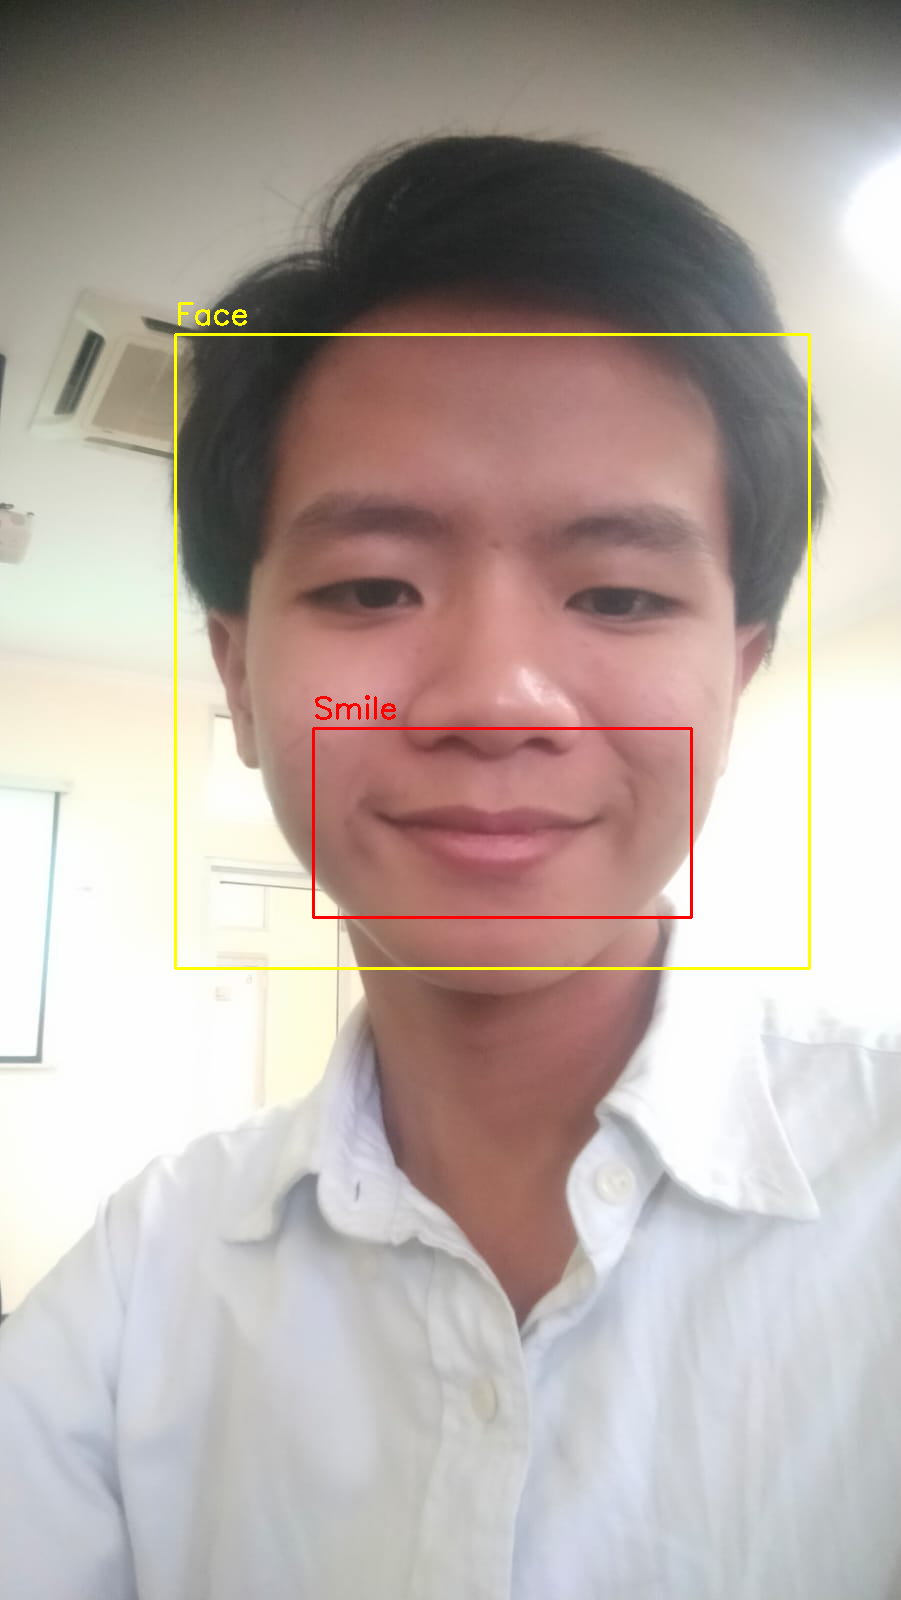

In [20]:
from google.colab.patches import cv2_imshow  # Fungsi untuk menampilkan gambar di Colab
import cv2  # Mengimpor OpenCV

# Membaca gambar dari file
img = cv2.imread('fotoganangsenyum.jpeg')

# Pastikan gambar berhasil dibaca
if img is None:
    print("Error: Gambar tidak ditemukan. Pastikan file ada di direktori yang benar.")
else:
    # Mengonversi gambar ke grayscale agar lebih mudah diproses oleh detektor
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Memuat model Haar Cascade dari OpenCV (menggunakan path default)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

    # Mendeteksi wajah dalam gambar grayscale
    faces = face_cascade.detectMultiScale(gray_img, 1.1, 9)

    print('Number of detected faces:', len(faces))  # Menampilkan jumlah wajah yang terdeteksi

    # Melakukan iterasi untuk setiap wajah yang terdeteksi
    for (x, y, w, h) in faces:
        # Menggambar kotak di sekitar wajah
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 255), 2)  # Kotak berwarna kuning
        cv2.putText(img, "Face", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)

        # Mengambil region of interest (ROI) untuk mendeteksi senyum hanya di dalam wajah
        roi_gray = gray_img[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]

        # Mendeteksi senyum di dalam area wajah
        smiles = smile_cascade.detectMultiScale(roi_gray, 1.8, 20)

        if len(smiles) > 0:
            print("Smile detected")  # Menampilkan pesan di terminal
            for (sx, sy, sw, sh) in smiles:
                cv2.rectangle(roi_color, (sx, sy), ((sx + sw), (sy + sh)), (0, 0, 255), 2)  # Kotak merah
                cv2.putText(roi_color, "Smile", (sx, sy - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        else:
            print("Smile not detected")

    # Menampilkan hasil deteksi dengan cv2_imshow (khusus Google Colab)
    cv2_imshow(img)


# 3.	Deteksi Wajah Menggunakan Webcam

In [70]:
import cv2

# **Muat model deteksi wajah**
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# **Buka Webcam**
cap = cv2.VideoCapture(0)

while True:
    # **Ambil frame dari webcam**
    ret, frame = cap.read()
    if not ret:
        break

    # **Konversi ke skala abu-abu**
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # **Deteksi wajah**
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # **Gambar kotak di sekitar wajah**
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 3)

    # **Tampilkan hasilnya**
    cv2.imshow('Deteksi Wajah', frame)

    # **Tekan 'q' untuk keluar**
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# **Tutup kamera dan jendela**
cap.release()
cv2.destroyAllWindows()
